BU PROJEDE YAKIT VERİMLİLİĞİNİ (MPG) ÖLÇMEK İÇİN BİR DEEP LEARNING MODELİ GELİŞTİRECEĞİZ.
YAKIT VERİMLİLİĞİNDEN KASIT 1 GALON İLE EN FAZLA KAÇ MİL GİDİLEBİLDİĞİDİR.
BU DEĞERİ BİZE MPG SÜTUNUNDAKİ VERİLER GÖSTERİYOR.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [137]:
data = pd.read_csv('auto-mpg.csv')

In [138]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [140]:
#horsepower SÜTUNUNDAKİ VERİLER OBJECT OLDUĞU İÇİN SAYISAL VEİRLERE ÇEVİRECEĞİZ.
#AŞAĞIDAKŞ KOD İLE SAYISAL OLMAYAN VERİLER YERİNE NaN YAZILDI.
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [141]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [142]:
#horsepower SÜTUNUNDA 6 TANE BOŞ VERİ VAR BUNU ORTALAMA İLE DOLDURACAĞIZ
data = data.fillna(data['horsepower'].mean())

In [143]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [144]:
data =pd.get_dummies(data, columns=['origin'])

In [145]:
#BURADA ORİGİN SÜTUNUNDA BULUNAN SAYILARI ÜLKE BAZLI OLARAK TEKRAR YAZDIRDIK.
data = data.rename(columns={
    'origin_1':'USA',
    'origin_2':'Europa',
    'origin_3':'Japan'    
})

In [146]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europa,Japan
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


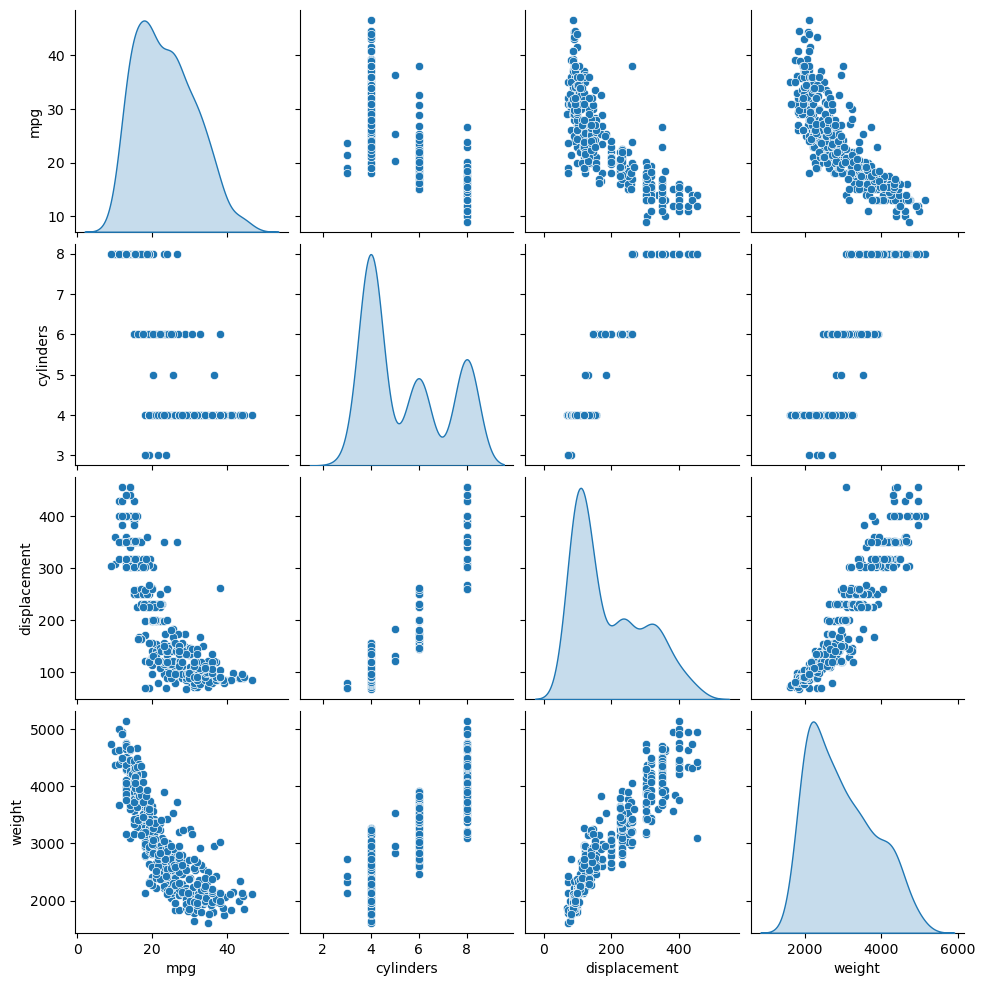

In [147]:
#AŞAĞIDA YAKIT VERİMLİLİĞİ, SİLİDİR, MOTOR HACMİ VE AĞIRLIK VERİLERİ ARASINDAKİ İKİLİ İLİŞKİLERİ GÖSTEREN GRAFİKLER ÇİZİLİYOR.
#BURADAN MESELA YAKIT VERİMLİLİĞ(MPG) İLE MOTOR HACMİ(displacement) ARASINDAKİ İLİŞKİYİ GÖZLEMLEYEBİLİRİZ.
#EN ÜSTTE BULUNAN SOLDAN 3. GRAFİĞE GÖRE MOTOR HACMİ ARTTIKÇA YAKIT VERİMLİLİĞİNİN AZALDIĞINI GÖREBİLİYORUZ.
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [148]:
data.corr()['mpg'].sort_values(ascending=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_21796\103784171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['mpg'].sort_values(ascending=False)


mpg             1.000000
model year      0.579267
Japan           0.442174
acceleration    0.420289
Europa          0.259022
USA            -0.568192
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

In [149]:
#BAĞIMSIZ DEĞİŞKENLER İLE HEDEF(BAĞIMLI) DEĞİŞKENİ X VE Y OLARAK TANIMLADIK
x = data.drop(['car name','mpg'],axis=1)
y = data[['mpg']]

In [150]:
#X DATAFRAMESİNİ SCALE ETTİK.
scale=StandardScaler()
x_scale = scale.fit_transform(x)

In [151]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y, test_size=0.1, random_state=25)

In [152]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [153]:
model.compile(loss='mean_squared_error',optimizer='adam' ,metrics=['mean_absolute_error', 'mean_squared_error'])

In [154]:
model.fit(x_train,y_train, epochs=60, verbose=1)

Epoch 1/60
12/12 [==============================] - 0s 909us/step - loss: 600.6974 - mean_absolute_error: 23.2947 - mean_squared_error: 600.6974
Epoch 2/60
12/12 [==============================] - 0s 828us/step - loss: 547.6101 - mean_absolute_error: 22.1449 - mean_squared_error: 547.6101
Epoch 3/60
12/12 [==============================] - 0s 818us/step - loss: 482.9280 - mean_absolute_error: 20.7003 - mean_squared_error: 482.9280
Epoch 4/60
12/12 [==============================] - 0s 818us/step - loss: 397.8396 - mean_absolute_error: 18.6223 - mean_squared_error: 397.8396
Epoch 5/60
12/12 [==============================] - 0s 1ms/step - loss: 291.4892 - mean_absolute_error: 15.6563 - mean_squared_error: 291.4892
Epoch 6/60
12/12 [==============================] - 0s 909us/step - loss: 177.7022 - mean_absolute_error: 11.7752 - mean_squared_error: 177.7022
Epoch 7/60
12/12 [==============================] - 0s 818us/step - loss: 94.4547 - mean_absolute_error: 8.0104 - mean_squared_error

In [155]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


2/2 [==============================] - 0s 2ms/step
R² Score: 0.9408156077719644


In [156]:
#MODELİMİZ 1.61 LİK BİR SAPMA İLE TAHMİN EDİYOR.
loss, mae, mse = model.evaluate(x_test, y_test, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.61 MPG


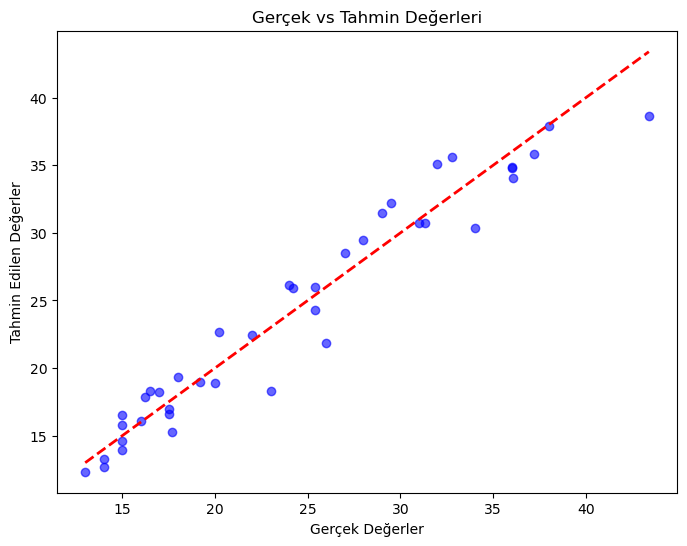

In [157]:
# AŞAĞIDAKİ KOD İLE TAHMİN EDİLEN DEĞERLER VE GERÇEK DEĞERLERİ KARŞILAŞTIRDIK. ORTADAKİ KIRMIZI KESİK ÇİZGİ OLMASI GEREKEN TAHMİN ÇİZGİSİ.
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)  #tahmin çizgisi 
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Değerleri")
plt.show()


BU PROJEDE BAŞARI ORANIMIZ YAKLAŞIK %94. ELİMİZDEKİ VERİLER İLE ARAÇLARIN YAKIT PERFORMANSINI TAHMİN EDEN BİR MODEL EĞİTTİK.